###### chi2 distribution

Ryan Reece <https://github.com/rreece>        
created: 2025-01-26

In [1]:
import math
import numpy as np

import hepplot as hep

## Cochran's theorem

$$ \frac{n \, \hat{\sigma}^2}{\sigma^2} \sim \chi^{2}_{n-1} $$

where the MLEs for a normal distribution are

$$ \hat{\mu} = \frac{1}{n} \sum_{i=1}^{n} x_i $$

and

$$ \hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^{n} ( x_i - \hat{\mu} )^2  $$

See Wikipedia: [Cochran's theorem](https://en.wikipedia.org/wiki/Cochran%27s_theorem#Estimation_of_variance).

Note the unbiased sample variance is

$$ s^2 = \frac{1}{(n-1)} \sum_{i=1}^{n} ( x_i - \hat{\mu} )^2  $$

So

$$ s^2 = \frac{n}{(n-1)} \, \hat{\sigma}^2 $$

and

$$ \frac{(n-1) \, s^2}{\sigma^2} \sim \chi^{2}_{n-1} $$


TODO:

-   Quantiles of $\chi^2 \Rightarrow$ $p$-values [Table](https://math.arizona.edu/~jwatkins/chi-square-table.pdf)
-   Multivariate case


## 1-d Gaussian

In [2]:
mu = 80
sigma = 10
n_times = 10

In [3]:
bins =  list(range(n_times+1))
y = [mu]*n_times
data = [ np.random.normal(loc=mu, scale=sigma) for _ in range(n_times) ]

(<Figure size 1000x1000 with 1 Axes>, [<AxesSubplot: >])

<Figure size 1000x1000 with 0 Axes>

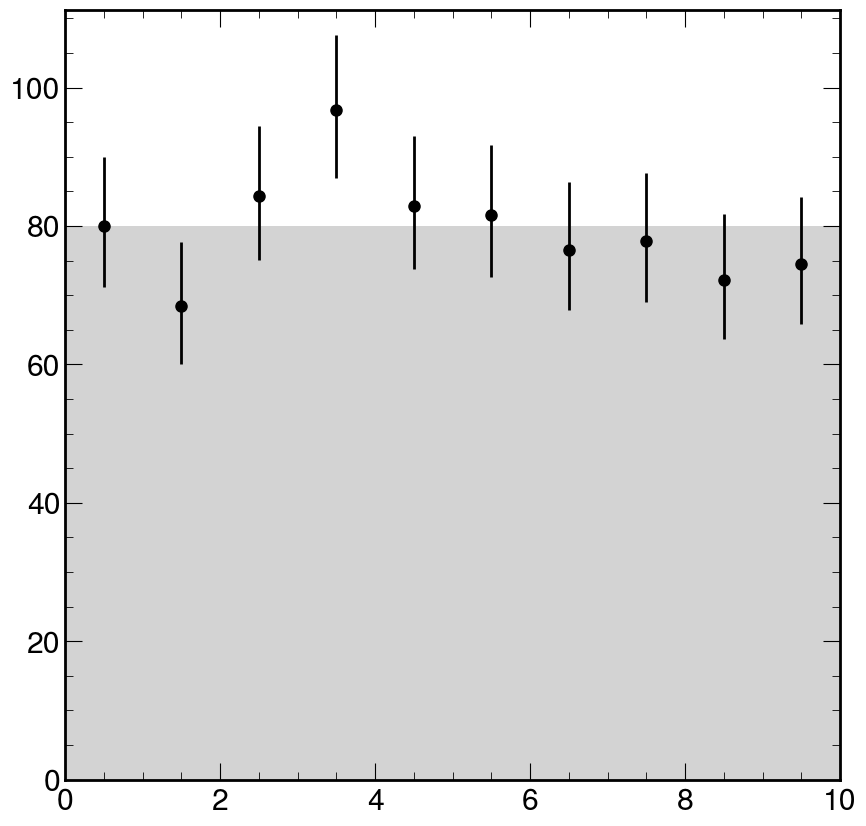

In [4]:
hep.plot.hist1d(bins, y, data=data)

In [5]:
np.sqrt(np.var(data, ddof=1))

7.814260805244571

## Calculate chi2 statistic

In [6]:
mu_hat = np.mean(data)

In [7]:
s2 = np.var(data, ddof=1)

In [8]:
z = sum( [ ((_x - mu_hat)**2)/(s2) for _i, _x in enumerate(data) ] )

In [9]:
z

8.999999999999998

## Monte Carlo chi2

In [10]:
def do_experiment():
    data = [ np.random.normal(loc=mu, scale=sigma) for _ in range(n_times) ]
#    mu_hat = np.mean(data)
#    s2 = np.var(data, ddof=1)  ## THIS IS CHEATING
#    z = sum( [ ((_x - mu_hat)**2)/(s2) for _i, _x in enumerate(data) ] )
    z = sum( [ ((_x - mu)**2)/(sigma**2) for _i, _x in enumerate(data) ] )
    return z

In [11]:
n_trials = 1000
n_chi2_bins = 30
results = [ do_experiment() for _ in range(n_trials) ]

In [12]:
#z = [ _r[3] for _r in results ]
z = results

In [13]:
chi2_bins = list(range(n_chi2_bins))

In [14]:
y = np.histogram(z, bins=chi2_bins)[0]

<Figure size 1000x1000 with 0 Axes>

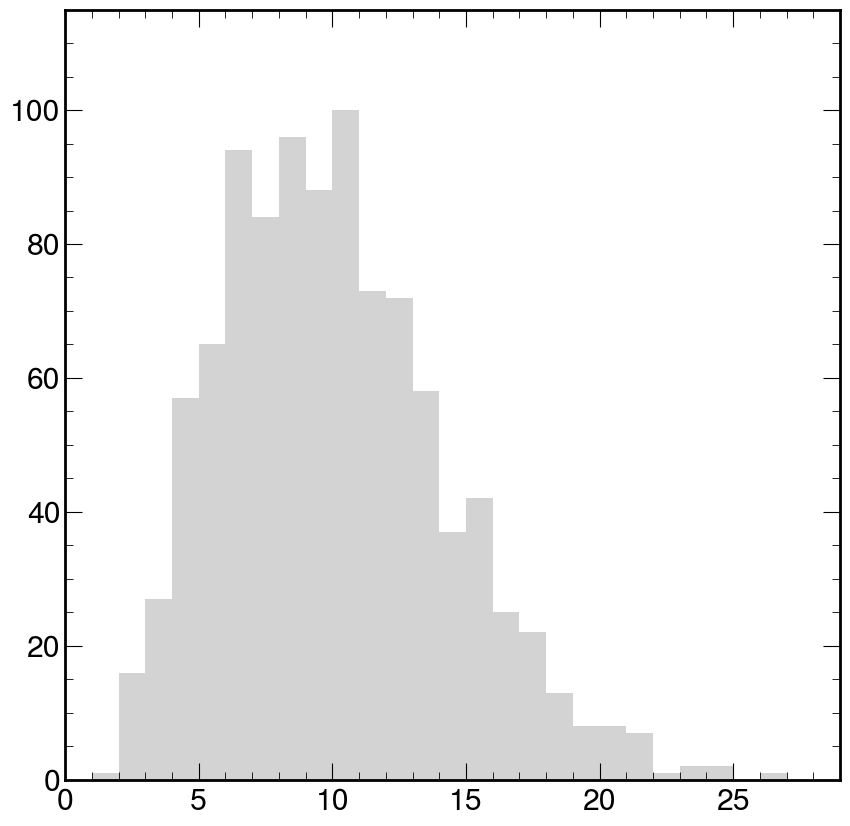

In [15]:
fig, axes = hep.plot.hist1d(bins=chi2_bins, y=y)

In [16]:
from scipy.stats import chi2
x = np.linspace(0, n_chi2_bins, 100)
dof = 10

In [17]:
axes[0].plot(x, n_trials*chi2.pdf(x, dof), label=f'dof={dof}')

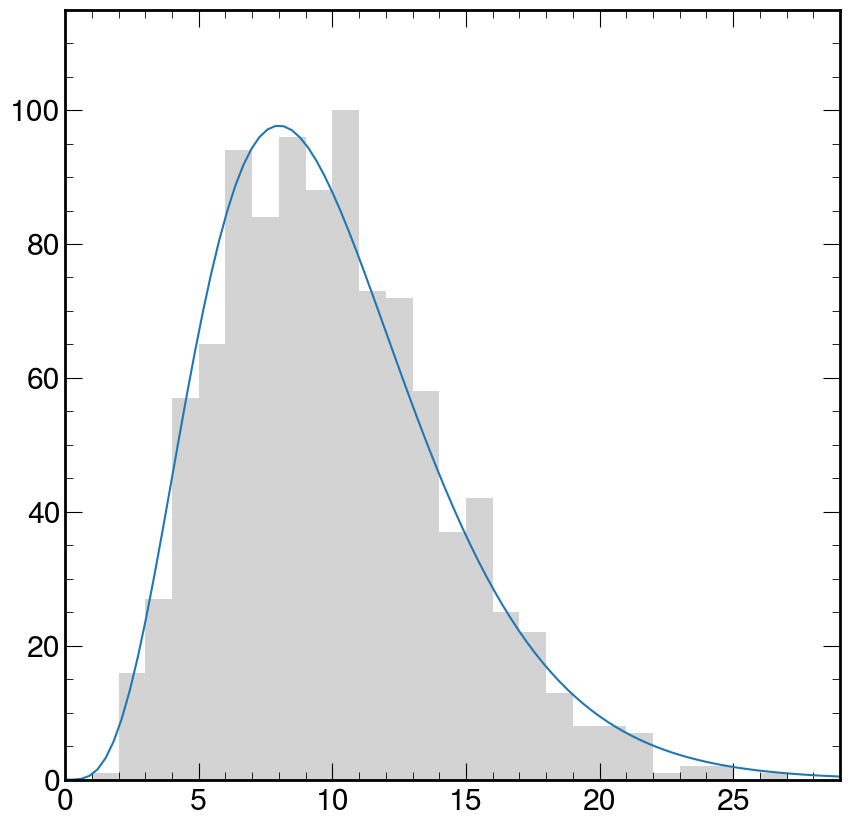

In [18]:
fig

## Quantiles to p-values

Cumulative distribution function:

$$ F(y) = \int_{-\infty}^{y} f(x) \, dx $$

$$ \bar{F}(y) = 1 - F(y) = \int_{y}^{\infty} f(x) \, dx $$

$p$-value from $\chi^2$:

$$ p = \int_{\chi^2(\mathrm{obs})}^{\infty} f(\chi^2) \, d\chi^2 = \bar{F}(\chi^2(\mathrm{obs}))$$

In [37]:
def calc_critical_stat(dist, dof, alpha):
    chi2_alpha = dist.ppf(1-alpha, dof)
    return chi2_alpha

def calc_p_value(dist, dof, test_stat):
    p_value = 1.0 - dist.cdf(test_stat, dof)
    return p_value

In [39]:
chi2_alpha = calc_critical_stat(chi2, dof, alpha)
chi2_alpha

23.209251158954356

In [40]:
calc_p_value(chi2, dof, chi2_alpha)

0.010000000000000009

In [41]:
calc_p_value(chi2, dof, 20.)

0.02925268807696113

In [20]:
# TODO: coverage study

## Wishart distribution

Scatter matrix:

$$ S = \sum_{i=1}^{n} ( x_i - \bar{x} ) ( x_i - \bar{x} )^\intercal   $$

If $X \sim N_{p}(0, V)$ then $S \sim W_{p}(V, n)$.

$$ W_{p}(V, n) $$

$$ W_{1}(1, n) = \chi^{2}_{n} $$

Variance of Wishart:

$$ n \, ( V_{ij}^{2} + V_{ii} V_{jj} ) $$

Covariance matrix:

$$ C = \frac{1}{n-1} S $$

Variance of covariance matrix:

$$ \mathrm{Var}(C) = \frac{1}{(n-1)^2} \mathrm{Var}(S) = \frac{n}{(n-1)^2} ( V_{ij}^{2} + V_{ii} V_{jj} ) \simeq \frac{1}{n-1} ( V_{ij}^{2} + V_{ii} V_{jj} ) $$

In [21]:
from scipy.stats import wishart

In [22]:
x = np.linspace(1e-5, 8, 100)

In [23]:
axes[0].plot(x, n_trials*wishart.pdf(x, df=dof, scale=1), label=f'dof={dof}')

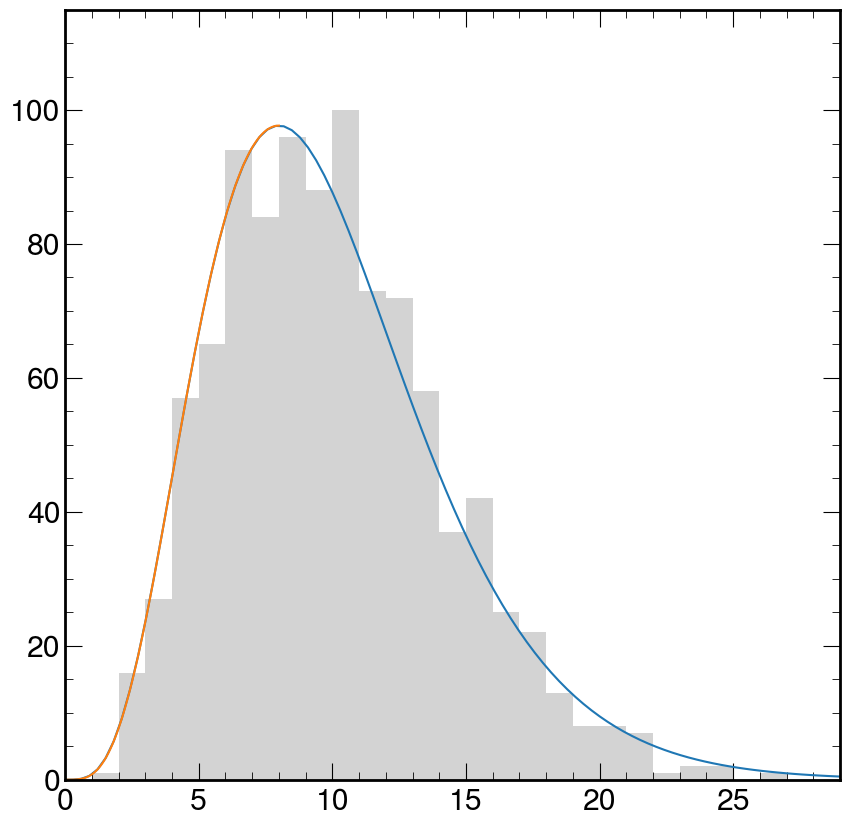

In [24]:
fig

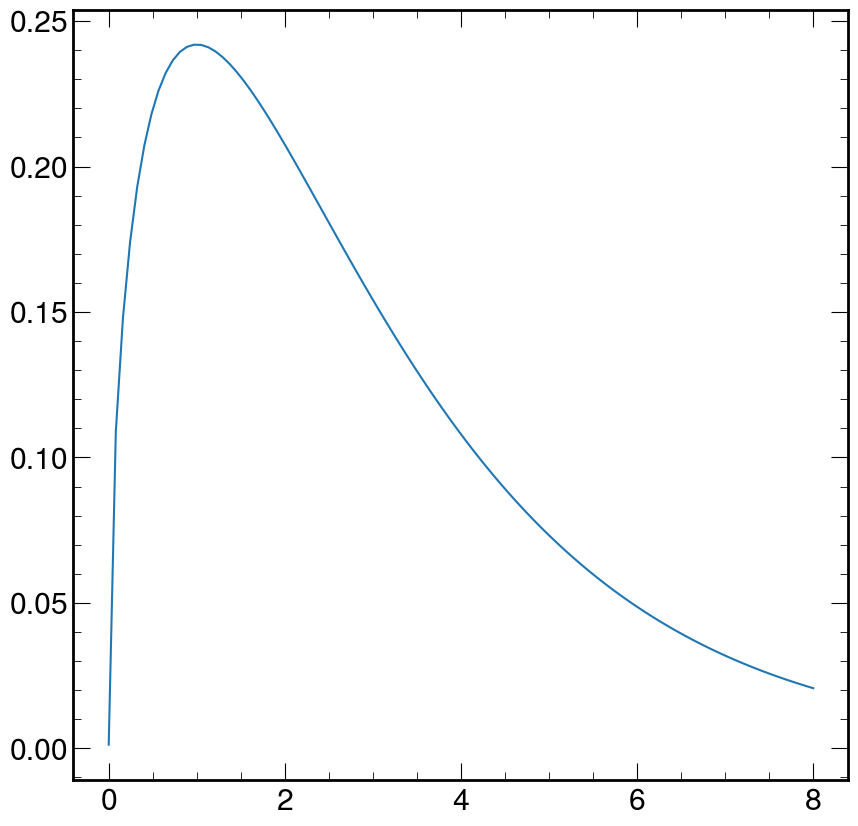

In [25]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wishart.html
import matplotlib.pyplot as plt

x = np.linspace(1e-5, 8, 100)
w = wishart.pdf(x, df=3, scale=1)
c = chi2.pdf(x, 3)
plt.plot(x, w)
plt.show()

In [26]:
w[:5]

array([0.00126156, 0.10892176, 0.14793434, 0.17400548, 0.1929669 ])

In [27]:
c[:5]

array([0.00126156, 0.10892176, 0.14793434, 0.17400548, 0.1929669 ])

In [28]:
wishart.pdf(1, df=3, scale=1)

0.24197072451914337